# **Deep Learning based Pneumonia disease classifier using chest x-ray Images**


In [24]:
#pip install --upgrade --force-reinstall <numpy>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `/opt/conda/bin/python3.7 -m pip install --upgrade --force-reinstall <numpy>'
Note: you may need to restart the kernel to use updated packages.


**Installing required packages**

In [2]:
!pip install opencv-python
!pip install tensorflow==2.6.0
!pip install tensorflow --upgrade --user
!pip install pip --upgrade --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.3/458.3 MB 2.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 68.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 72.1 MB/s eta 0:00:00:00:01
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30694 sha256=b4bae94bf0484a85b77216228d7494891f17b51ed9b83d5e82f52a6e0d1e06a0
  Stored in directory: /root/.cache/pip/wheels/51/40/ff/2ba7d5d0dee868c4dddb5f9e7389c7ba8afd841a75ce58a576
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=f14303aca81ec4062fd790b82a8e46f0c5153cea97b0a3402f0e439652c8e147
  Stored in directory: /root/.cache/pip/w

**Importing required libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import numpy as np
import pathlib
import glob

In [3]:
#assigning directory
directory=pathlib.Path("/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)")

In [4]:
# Just needed in case you'd like to append it to an array
data = []

for filename in os.listdir("."):
    if filename.endswith("jpeg"): 
        # Your code comes here such as 
        print(filename)
        data.append(filename)

In [5]:
#count of images in the directory given
image_count=len(list(directory.glob('*/*.jpeg')))
#print(list(directory.glob('/*.jpg')))
image_count

4580

In [6]:
#creating dictionary of flower species
flower_images_dict={
    "Viral":list(directory.glob('Viral/*.jpeg')),
    "Bacterial":list(directory.glob('Bacterial/*.jpeg')),
    "Normal":list(directory.glob('Normal/*.jpeg'))
    
}

In [7]:
flower_images_dict

{'Viral': [PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person1180_virus_2010.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person1676_virus_2892.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person1230_virus_2081.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person1513_virus_2632.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person124_virus_238.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person746_virus_1369.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person466_virus_960.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person1650_virus_2852.jpeg'),
  PosixPath('/kaggle/input/chest-x-r

In [8]:
#Different species list
keys=["Viral","Bacterial","Normal"]

In [9]:
#resizing and creating labels using computer vision
count = 0
resized,labels=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        print("completed")
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,(224,224))
        count=count+1
        print(count)
        resized.append(resized_image)
        labels.append(keys.index(flower_name))
flower_images_dict

completed
1
completed
2
completed
3
completed
4
completed
5
completed
6
completed
7
completed
8
completed
9
completed
10
completed
11
completed
12
completed
13
completed
14
completed
15
completed
16
completed
17
completed
18
completed
19
completed
20
completed
21
completed
22
completed
23
completed
24
completed
25
completed
26
completed
27
completed
28
completed
29
completed
30
completed
31
completed
32
completed
33
completed
34
completed
35
completed
36
completed
37
completed
38
completed
39
completed
40
completed
41
completed
42
completed
43
completed
44
completed
45
completed
46
completed
47
completed
48
completed
49
completed
50
completed
51
completed
52
completed
53
completed
54
completed
55
completed
56
completed
57
completed
58
completed
59
completed
60
completed
61
completed
62
completed
63
completed
64
completed
65
completed
66
completed
67
completed
68
completed
69
completed
70
completed
71
completed
72
completed
73
completed
74
completed
75
completed
76
completed
77
complete

{'Viral': [PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person1180_virus_2010.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person1676_virus_2892.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person1230_virus_2081.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person1513_virus_2632.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person124_virus_238.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person746_virus_1369.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person466_virus_960.jpeg'),
  PosixPath('/kaggle/input/chest-x-ray-images-for-pneumonia/Chest_X-ray_(Pneumonia)/Viral/person1650_virus_2852.jpeg'),
  PosixPath('/kaggle/input/chest-x-r

In [10]:
#function to print images
def print_image(i,j):
    plt.imshow(i)
    plt.title(keys[j])

In [11]:
#splitting data into train and test
#if any integer is given to random_state it will generate and give same set of data each time we run the code and if we give 
#None different sequences will be generated
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized,labels,test_size=0.25,random_state=0)

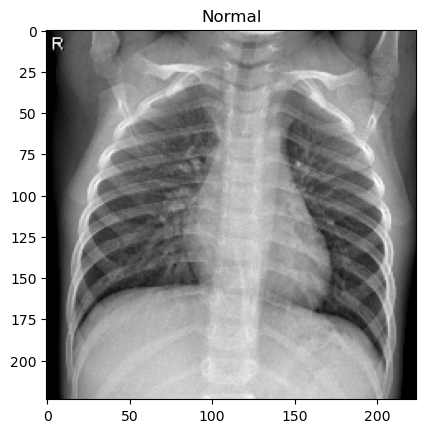

In [11]:
print_image(x_train[37],y_train[37])

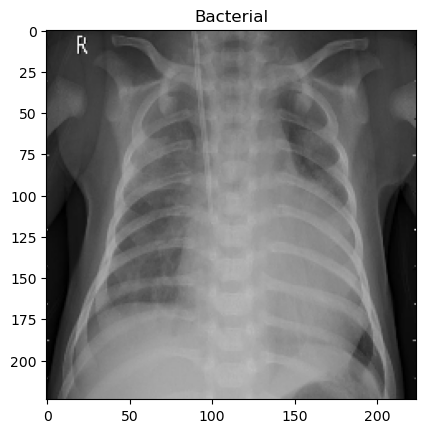

In [12]:
print_image(x_train[10],y_train[10])

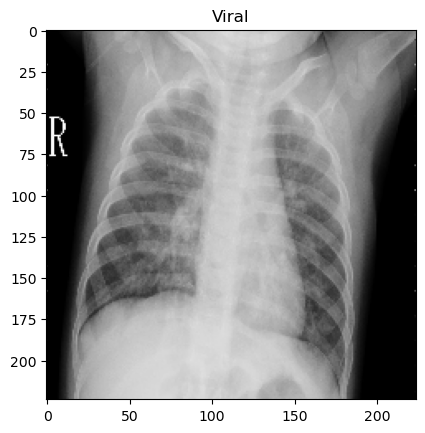

In [13]:
print_image(x_train[15],y_train[15])

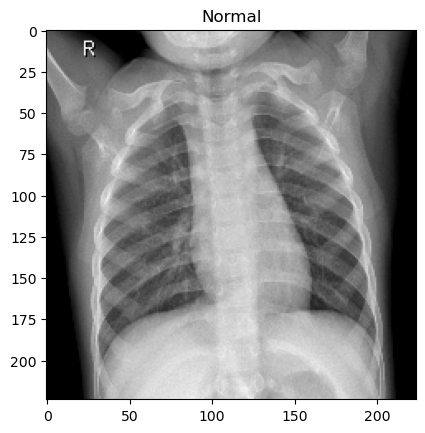

In [14]:
print_image(x_test[6],y_test[6])

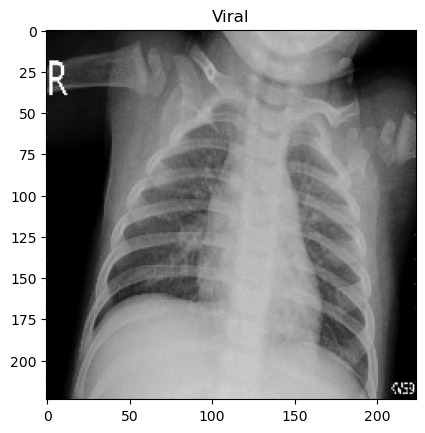

In [15]:
print_image(x_test[19],y_test[19])

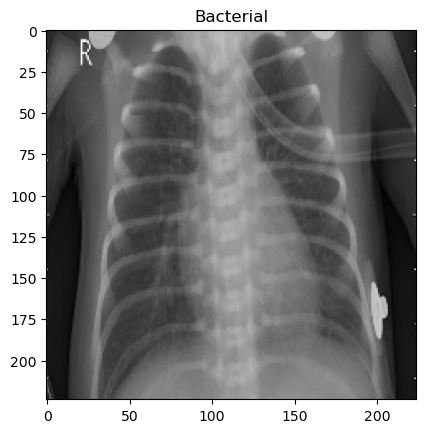

In [16]:
print_image(x_test[28],y_test[28])

In [12]:
#normalizing data
x_train_scaled=np.array(x_train)/255
x_test_scaled=np.array(x_test)/255

In [13]:
x_train_scaled.shape

(3435, 224, 224, 3)

In [14]:
y_train=np.array(y_train)
y_train.shape

(3435,)

In [15]:
x_test_scaled.shape

(1145, 224, 224, 3)

In [16]:
y_test=np.array(y_test)
y_test.shape

(1145,)

**Callbacks for stopping when the required accuracy is achieved**

In [17]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        print("call")
        if(logs.get('accuracy') > .99):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))   
            self.model.stop_training = True
callbacks = myCallback()

# **1. Simple CNN Model**

# **1.1 Activation function = "Relu" ,Optimizer = "adam"**

In [25]:
model=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(3,activation="softmax")])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
compare = model.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 12s 25ms/step - loss: 2.3149 - accuracy: 0.5953
Epoch 2/100
108/108 [==============================] - 3s 23ms/step - loss: 0.5143 - accuracy: 0.8058
Epoch 3/100
108/108 [==============================] - 3s 27ms/step - loss: 0.4312 - accuracy: 0.8297
Epoch 4/100
108/108 [==============================] - 3s 24ms/step - loss: 0.3553 - accuracy: 0.8658
Epoch 5/100
108/108 [==============================] - 3s 23ms/step - loss: 0.2927 - accuracy: 0.8888
Epoch 6/100
108/108 [==============================] - 3s 23ms/step - loss: 0.2608 - accuracy: 0.9080
Epoch 7/100
108/108 [==============================] - 3s 24ms/step - loss: 0.2081 - accuracy: 0.9258
Epoch 8/100
108/108 [==============================] - 3s 25ms/step - loss: 0.1655 - accuracy: 0.9447
Epoch 9/100
108/108 [==============================] - 3s 24ms/step - loss: 0.1330 - accuracy: 0.9578
Epoch 10/100
108/108 [==============================] - 3s 23ms/step - loss: 0.09

In [27]:
model.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 19ms/step - loss: 0.5323 - accuracy: 0.8480


[0.532349705696106, 0.8480349183082581]

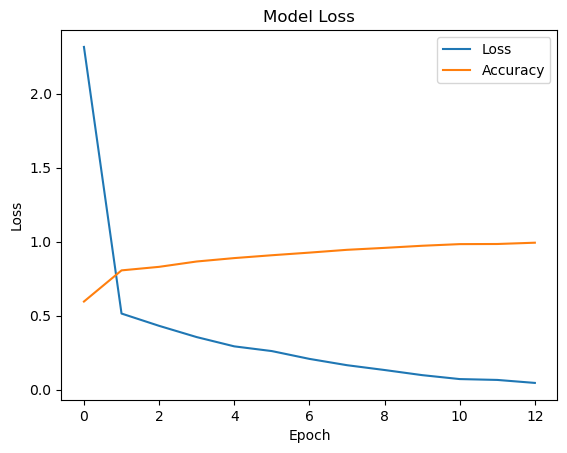

In [28]:
# Plot training & validation loss values
plt.plot(compare.history['loss'])
plt.plot(compare.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **1.2 Activation function = "Relu" ,Optimizer = "adamax"**

In [25]:
model1=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(3,activation="softmax")])
model1.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
compare_ = model1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 17s 24ms/step - loss: 4.2812 - accuracy: 0.6070
Epoch 2/100
108/108 [==============================] - 2s 23ms/step - loss: 0.5992 - accuracy: 0.7633
Epoch 3/100
108/108 [==============================] - 3s 23ms/step - loss: 0.4557 - accuracy: 0.8172
Epoch 4/100
108/108 [==============================] - 3s 24ms/step - loss: 0.4380 - accuracy: 0.8210
Epoch 5/100
108/108 [==============================] - 3s 23ms/step - loss: 0.4346 - accuracy: 0.8288
Epoch 6/100
108/108 [==============================] - 3s 23ms/step - loss: 0.4501 - accuracy: 0.8183
Epoch 7/100
108/108 [==============================] - 3s 23ms/step - loss: 0.3688 - accuracy: 0.8579
Epoch 8/100
108/108 [==============================] - 3s 24ms/step - loss: 0.3285 - accuracy: 0.8716
Epoch 9/100
108/108 [==============================] - 3s 24ms/step - loss: 0.3358 - accuracy: 0.8658
Epoch 10/100
108/108 [==============================] - 3s 25ms/step - loss: 0.38

In [27]:
model1.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 21ms/step - loss: 0.4468 - accuracy: 0.8454


[0.44678425788879395, 0.8454148769378662]

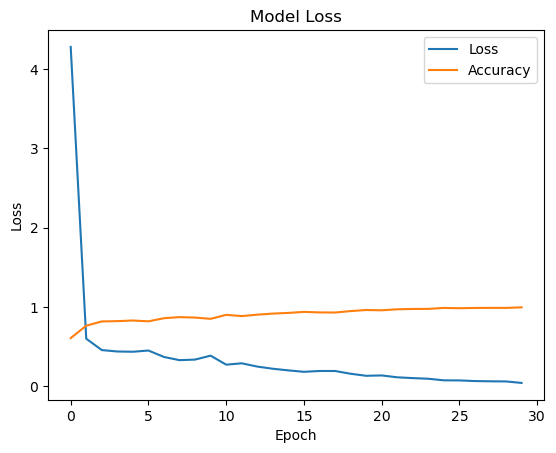

In [28]:
# Plot training & validation loss values
plt.plot(compare_.history['loss'])
plt.plot(compare_.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **1.3 Activation function = "Relu" ,Optimizer = "RMSProp"**

In [27]:
model2=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(3,activation="softmax")])
model2.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [28]:
compare_1 = model2.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 16s 24ms/step - loss: 7.4613 - accuracy: 0.6288
Epoch 2/100
108/108 [==============================] - 3s 23ms/step - loss: 0.5020 - accuracy: 0.8148
Epoch 3/100
108/108 [==============================] - 3s 23ms/step - loss: 0.3891 - accuracy: 0.8594
Epoch 4/100
108/108 [==============================] - 2s 22ms/step - loss: 0.2652 - accuracy: 0.9025
Epoch 5/100
108/108 [==============================] - 2s 23ms/step - loss: 0.2064 - accuracy: 0.9266
Epoch 6/100
108/108 [==============================] - 2s 23ms/step - loss: 0.1929 - accuracy: 0.9328
Epoch 7/100
108/108 [==============================] - 3s 25ms/step - loss: 0.1270 - accuracy: 0.9557
Epoch 8/100
108/108 [==============================] - 2s 22ms/step - loss: 0.0957 - accuracy: 0.9651
Epoch 9/100
108/108 [==============================] - 2s 22ms/step - loss: 0.0880 - accuracy: 0.9776
Epoch 10/100
108/108 [==============================] - 2s 22ms/step - loss: 0.07

In [29]:
model2.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 24ms/step - loss: 0.7350 - accuracy: 0.8271


[0.734977662563324, 0.8270742297172546]

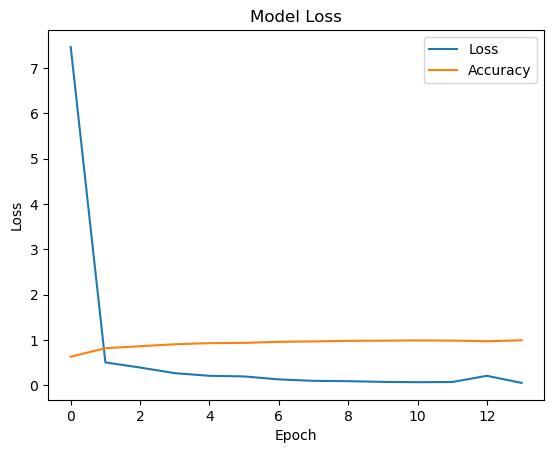

In [30]:
# Plot training & validation loss values
plt.plot(compare_1.history['loss'])
plt.plot(compare_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **1.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [25]:
model3=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(3,activation="softmax")])
model3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
compare_2 = model3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 11s 26ms/step - loss: 5.6582 - accuracy: 0.6256
Epoch 2/100
108/108 [==============================] - 2s 22ms/step - loss: 0.4539 - accuracy: 0.8317
Epoch 3/100
108/108 [==============================] - 3s 23ms/step - loss: 0.3244 - accuracy: 0.8763
Epoch 4/100
108/108 [==============================] - 3s 24ms/step - loss: 0.2529 - accuracy: 0.9074
Epoch 5/100
108/108 [==============================] - 2s 22ms/step - loss: 0.2107 - accuracy: 0.9269
Epoch 6/100
108/108 [==============================] - 2s 22ms/step - loss: 0.1363 - accuracy: 0.9537
Epoch 7/100
108/108 [==============================] - 2s 23ms/step - loss: 0.1265 - accuracy: 0.9595
Epoch 8/100
108/108 [==============================] - 3s 24ms/step - loss: 0.0895 - accuracy: 0.9691
Epoch 9/100
108/108 [==============================] - 2s 22ms/step - loss: 0.0707 - accuracy: 0.9773
Epoch 10/100
108/108 [==============================] - 2s 23ms/step - loss: 0.05

In [27]:
model3.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 20ms/step - loss: 0.6657 - accuracy: 0.8515


[0.6657480001449585, 0.8515284061431885]

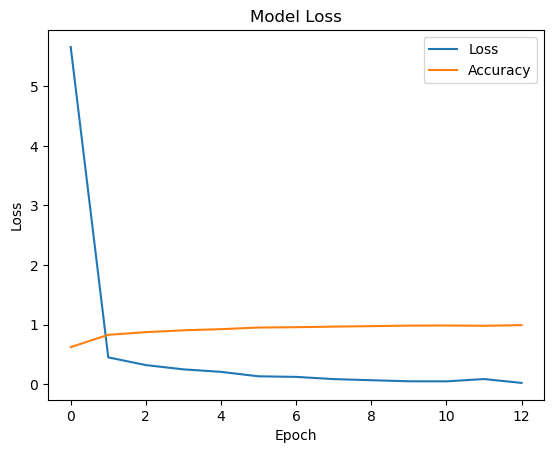

In [28]:
# Plot training & validation loss values
plt.plot(compare_2.history['loss'])
plt.plot(compare_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **1.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [25]:
model4=models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(3,activation="softmax")])
model4.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
compare_3 = model4.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 12s 25ms/step - loss: 1.0375 - accuracy: 0.5223
Epoch 2/100
108/108 [==============================] - 3s 25ms/step - loss: 0.9386 - accuracy: 0.6737
Epoch 3/100
108/108 [==============================] - 3s 24ms/step - loss: 0.8645 - accuracy: 0.7089
Epoch 4/100
108/108 [==============================] - 3s 24ms/step - loss: 0.8061 - accuracy: 0.7295
Epoch 5/100
108/108 [==============================] - 3s 24ms/step - loss: 0.7609 - accuracy: 0.7386
Epoch 6/100
108/108 [==============================] - 3s 25ms/step - loss: 0.7250 - accuracy: 0.7435
Epoch 7/100
108/108 [==============================] - 3s 25ms/step - loss: 0.6962 - accuracy: 0.7543
Epoch 8/100
108/108 [==============================] - 3s 26ms/step - loss: 0.6724 - accuracy: 0.7543
Epoch 9/100
108/108 [==============================] - 3s 24ms/step - loss: 0.6529 - accuracy: 0.7590
Epoch 10/100
108/108 [==============================] - 3s 24ms/step - loss: 0.63

In [27]:
model4.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 20ms/step - loss: 0.3957 - accuracy: 0.8480


[0.39567169547080994, 0.8480349183082581]

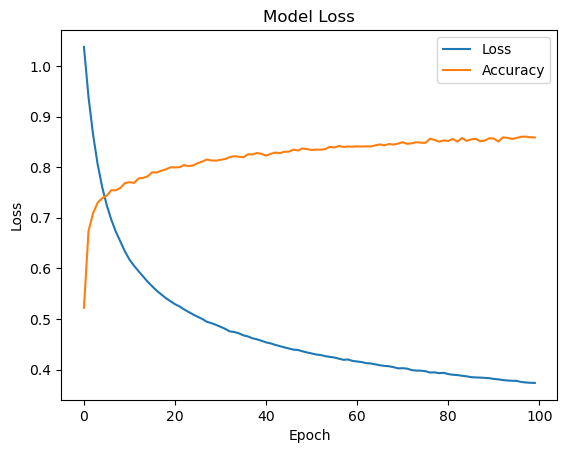

In [28]:
# Plot training & validation loss values
plt.plot(compare_3.history['loss'])
plt.plot(compare_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **2. CNN Model With Data Augmentation layers and Dropout layers**

# **2.1 Activation function = "Relu" ,Optimizer = "adam"**

In [28]:
model2_1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model2_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [29]:
compare2_1 = model2_1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 21s 87ms/step - loss: 2.0711 - accuracy: 0.3476
Epoch 2/100
108/108 [==============================] - 9s 87ms/step - loss: 1.0479 - accuracy: 0.4515
Epoch 3/100
108/108 [==============================] - 9s 84ms/step - loss: 0.9475 - accuracy: 0.5406
Epoch 4/100
108/108 [==============================] - 9s 83ms/step - loss: 0.8877 - accuracy: 0.5729
Epoch 5/100
108/108 [==============================] - 10s 90ms/step - loss: 0.8725 - accuracy: 0.5694
Epoch 6/100
108/108 [==============================] - 9s 81ms/step - loss: 0.8547 - accuracy: 0.5787
Epoch 7/100
108/108 [==============================] - 9s 84ms/step - loss: 0.8404 - accuracy: 0.5974
Epoch 8/100
108/108 [==============================] - 9s 84ms/step - loss: 0.8095 - accuracy: 0.6070
Epoch 9/100
108/108 [==============================] - 10s 90ms/step - loss: 0.8215 - accuracy: 0.6017
Epoch 10/100
108/108 [==============================] - 9s 85ms/step - loss: 0.

In [30]:
model2_1.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 19ms/step - loss: 0.4424 - accuracy: 0.8314


[0.4423845112323761, 0.8314410448074341]

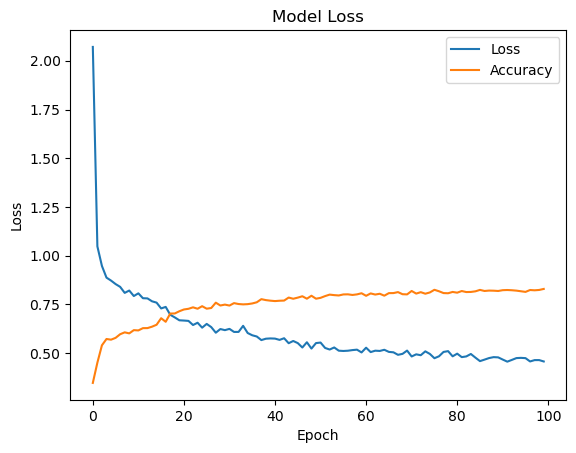

In [31]:
# Plot training & validation loss values
plt.plot(compare2_1.history['loss'])
plt.plot(compare2_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **2.2 Activation function = "Relu" ,Optimizer = "adamax"**

In [26]:
model2_2=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model2_2.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [27]:
compare2_2 = model2_2.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 21s 87ms/step - loss: 2.8818 - accuracy: 0.3659
Epoch 2/100
108/108 [==============================] - 9s 82ms/step - loss: 1.0729 - accuracy: 0.4079
Epoch 3/100
108/108 [==============================] - 9s 85ms/step - loss: 1.0505 - accuracy: 0.4536
Epoch 4/100
108/108 [==============================] - 10s 88ms/step - loss: 1.0285 - accuracy: 0.4739
Epoch 5/100
108/108 [==============================] - 9s 84ms/step - loss: 0.9800 - accuracy: 0.5426
Epoch 6/100
108/108 [==============================] - 9s 86ms/step - loss: 0.9790 - accuracy: 0.5328
Epoch 7/100
108/108 [==============================] - 10s 89ms/step - loss: 0.9650 - accuracy: 0.5447
Epoch 8/100
108/108 [==============================] - 9s 83ms/step - loss: 0.9703 - accuracy: 0.5068
Epoch 9/100
108/108 [==============================] - 9s 88ms/step - loss: 0.9624 - accuracy: 0.5130
Epoch 10/100
108/108 [==============================] - 10s 89ms/step - loss: 0

In [28]:
model2_2.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 20ms/step - loss: 0.4504 - accuracy: 0.8079


[0.4503661096096039, 0.807860255241394]

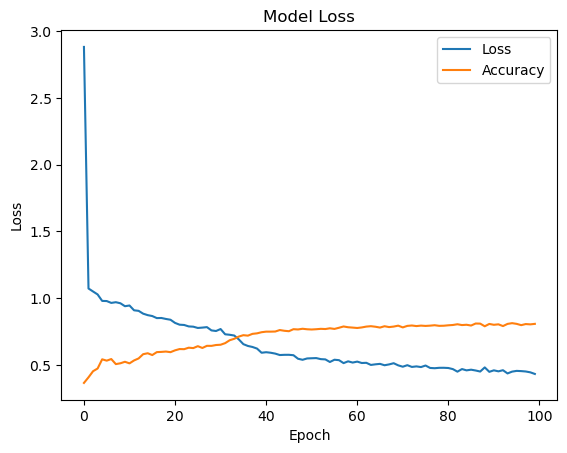

In [29]:
# Plot training & validation loss values
plt.plot(compare2_2.history['loss'])
plt.plot(compare2_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **2.3 Activation function = "Relu" ,Optimizer = "RMSprop"**

In [31]:
model2_3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model2_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [32]:
compare2_3 = model2_3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 22s 96ms/step - loss: 4.2545 - accuracy: 0.3677
Epoch 2/100
108/108 [==============================] - 11s 98ms/step - loss: 0.9901 - accuracy: 0.4955
Epoch 3/100
108/108 [==============================] - 10s 93ms/step - loss: 0.7903 - accuracy: 0.6565
Epoch 4/100
108/108 [==============================] - 10s 90ms/step - loss: 0.7276 - accuracy: 0.6815
Epoch 5/100
108/108 [==============================] - 11s 100ms/step - loss: 0.6736 - accuracy: 0.7074
Epoch 6/100
108/108 [==============================] - 10s 95ms/step - loss: 0.6265 - accuracy: 0.7295
Epoch 7/100
108/108 [==============================] - 10s 96ms/step - loss: 0.6226 - accuracy: 0.7211
Epoch 8/100
108/108 [==============================] - 11s 100ms/step - loss: 0.6136 - accuracy: 0.7330
Epoch 9/100
108/108 [==============================] - 10s 94ms/step - loss: 0.5888 - accuracy: 0.7479
Epoch 10/100
108/108 [==============================] - 10s 91ms/step -

In [33]:
model2_3.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 24ms/step - loss: 0.4691 - accuracy: 0.8419


[0.4690794348716736, 0.8419213891029358]

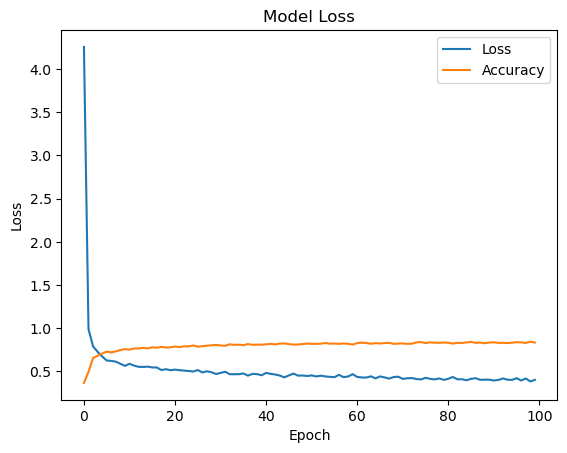

In [34]:
# Plot training & validation loss values
plt.plot(compare2_3.history['loss'])
plt.plot(compare2_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **2.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [25]:
model2_4=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model2_4.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
compare2_4 = model2_4.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 21s 96ms/step - loss: 1.1481 - accuracy: 0.3758
Epoch 2/100
108/108 [==============================] - 9s 88ms/step - loss: 1.0182 - accuracy: 0.4789
Epoch 3/100
108/108 [==============================] - 9s 87ms/step - loss: 0.9263 - accuracy: 0.5467
Epoch 4/100
108/108 [==============================] - 10s 94ms/step - loss: 0.8605 - accuracy: 0.6032
Epoch 5/100
108/108 [==============================] - 10s 94ms/step - loss: 0.7970 - accuracy: 0.6285
Epoch 6/100
108/108 [==============================] - 10s 89ms/step - loss: 0.7885 - accuracy: 0.6451
Epoch 7/100
108/108 [==============================] - 12s 109ms/step - loss: 0.7669 - accuracy: 0.6591
Epoch 8/100
108/108 [==============================] - 10s 90ms/step - loss: 0.7412 - accuracy: 0.6681
Epoch 9/100
108/108 [==============================] - 9s 88ms/step - loss: 0.7402 - accuracy: 0.6771
Epoch 10/100
108/108 [==============================] - 10s 93ms/step - los

In [27]:
model2_4.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 21ms/step - loss: 0.3931 - accuracy: 0.8463


[0.3931017518043518, 0.8462882041931152]

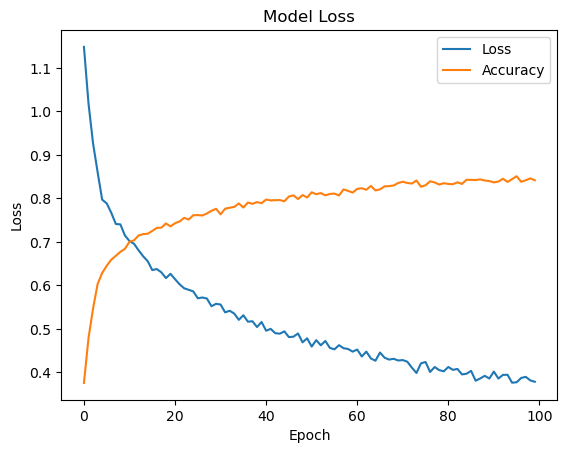

In [28]:
# Plot training & validation loss values
plt.plot(compare2_4.history['loss'])
plt.plot(compare2_4.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **2.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [28]:
model2_5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3,activation="softmax")
    #layers.Dense(2,kernel_regularizer=l2(0.01),activation="softmax")
])
model2_5.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [29]:
compare2_5 = model2_5.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 21s 87ms/step - loss: 1.0844 - accuracy: 0.3916
Epoch 2/100
108/108 [==============================] - 9s 85ms/step - loss: 1.0264 - accuracy: 0.4865
Epoch 3/100
108/108 [==============================] - 9s 87ms/step - loss: 0.9866 - accuracy: 0.5261
Epoch 4/100
108/108 [==============================] - 9s 87ms/step - loss: 0.9562 - accuracy: 0.5482
Epoch 5/100
108/108 [==============================] - 9s 85ms/step - loss: 0.9286 - accuracy: 0.5715
Epoch 6/100
108/108 [==============================] - 10s 89ms/step - loss: 0.9073 - accuracy: 0.5817
Epoch 7/100
108/108 [==============================] - 9s 84ms/step - loss: 0.8871 - accuracy: 0.5907
Epoch 8/100
108/108 [==============================] - 9s 85ms/step - loss: 0.8776 - accuracy: 0.6023
Epoch 9/100
108/108 [==============================] - 9s 83ms/step - loss: 0.8693 - accuracy: 0.6047
Epoch 10/100
108/108 [==============================] - 10s 89ms/step - loss: 0.

In [30]:
model2_5.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 20ms/step - loss: 0.5527 - accuracy: 0.7738


[0.5526530146598816, 0.7737991213798523]

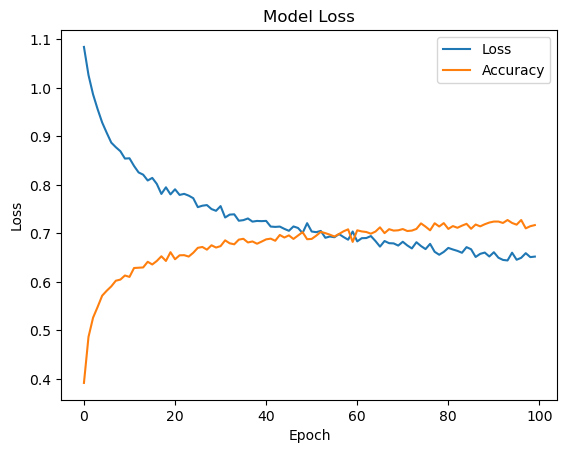

In [31]:
# Plot training & validation loss values
plt.plot(compare2_5.history['loss'])
plt.plot(compare2_5.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **3. CNN Model with only Dropout layers**

# **3.1 Activation function = "Relu" ,Optimizer = "Adam"**

In [25]:
model3_1=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.6),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.6),
    layers.Dense(32,activation="relu"),
    layers.Dropout(0.6),
    layers.Dense(3,activation="softmax")
])
model3_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [26]:
compare3_1 = model3_1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 9s 14ms/step - loss: 2.9317 - accuracy: 0.3432
Epoch 2/100
108/108 [==============================] - 2s 15ms/step - loss: 1.1178 - accuracy: 0.3464
Epoch 3/100
108/108 [==============================] - 1s 13ms/step - loss: 1.1179 - accuracy: 0.3459
Epoch 4/100
108/108 [==============================] - 2s 14ms/step - loss: 1.1032 - accuracy: 0.3456
Epoch 5/100
108/108 [==============================] - 2s 14ms/step - loss: 1.0984 - accuracy: 0.3459
Epoch 6/100
108/108 [==============================] - 1s 14ms/step - loss: 1.0984 - accuracy: 0.3459
Epoch 7/100
108/108 [==============================] - 2s 14ms/step - loss: 1.0986 - accuracy: 0.3459
Epoch 8/100
108/108 [==============================] - 2s 14ms/step - loss: 1.0984 - accuracy: 0.3459
Epoch 9/100
108/108 [==============================] - 2s 16ms/step - loss: 1.0984 - accuracy: 0.3459
Epoch 10/100
108/108 [==============================] - 2s 14ms/step - loss: 1.098

In [27]:
model3_1.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 16ms/step - loss: 1.0980 - accuracy: 0.3511


[1.098008155822754, 0.3510917127132416]

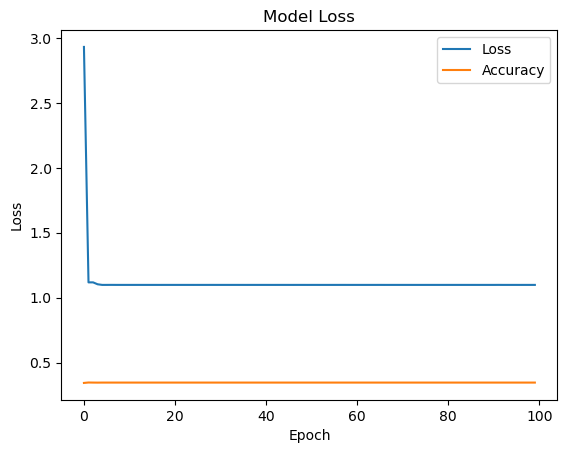

In [28]:
# Plot training & validation loss values
plt.plot(compare3_1.history['loss'])
plt.plot(compare3_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **3.2 Activation function = "Relu" ,Optimizer = "Adamax"**

In [23]:
model3_2=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.4),
    layers.Dense(3,activation="softmax")
])
model3_2.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [24]:
compare3_2 = model3_2.fit(x_train_scaled,np.array(y_train),epochs=50,callbacks=[callbacks])

Epoch 1/50
108/108 [==============================] - 8s 15ms/step - loss: 1.9355 - accuracy: 0.3709
Epoch 2/50
108/108 [==============================] - 1s 14ms/step - loss: 1.0989 - accuracy: 0.3135
Epoch 3/50
108/108 [==============================] - 1s 14ms/step - loss: 1.0987 - accuracy: 0.3269
Epoch 4/50
108/108 [==============================] - 2s 14ms/step - loss: 1.0986 - accuracy: 0.3397
Epoch 5/50
108/108 [==============================] - 2s 14ms/step - loss: 1.0986 - accuracy: 0.3459
Epoch 6/50
108/108 [==============================] - 2s 16ms/step - loss: 1.0984 - accuracy: 0.3459
Epoch 7/50
108/108 [==============================] - 2s 14ms/step - loss: 1.0984 - accuracy: 0.3459
Epoch 8/50
108/108 [==============================] - 2s 17ms/step - loss: 1.0983 - accuracy: 0.3459
Epoch 9/50
108/108 [==============================] - 2s 14ms/step - loss: 1.0984 - accuracy: 0.3459
Epoch 10/50
108/108 [==============================] - 2s 14ms/step - loss: 1.0984 - accura

In [25]:
model3_2.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 16ms/step - loss: 1.0980 - accuracy: 0.3511


[1.09800124168396, 0.3510917127132416]

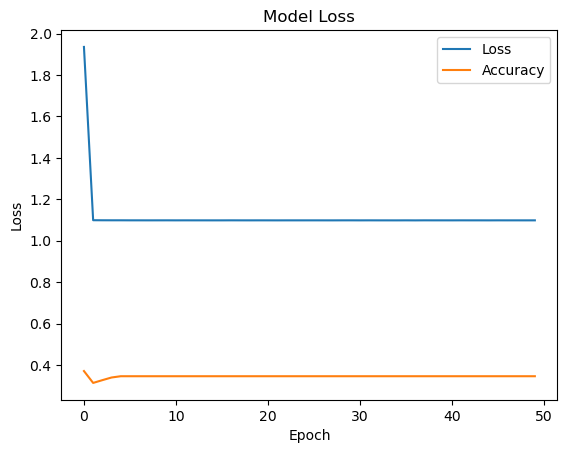

In [26]:
# Plot training & validation loss values
plt.plot(compare3_2.history['loss'])
plt.plot(compare3_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **3.3 Activation function = "Relu" ,Optimizer = "RMSprop"**

In [20]:
model3_3=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3,activation="softmax")
])
model3_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [21]:
compare3_3 = model3_3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 8s 14ms/step - loss: 3.3190 - accuracy: 0.3365
Epoch 2/100
108/108 [==============================] - 2s 14ms/step - loss: 1.0987 - accuracy: 0.3438
Epoch 3/100
108/108 [==============================] - 2s 14ms/step - loss: 1.0985 - accuracy: 0.3459
Epoch 4/100
108/108 [==============================] - 1s 14ms/step - loss: 1.0984 - accuracy: 0.3459
Epoch 5/100
108/108 [==============================] - 2s 14ms/step - loss: 1.0984 - accuracy: 0.3459
Epoch 6/100
108/108 [==============================] - 2s 17ms/step - loss: 1.0985 - accuracy: 0.3459
Epoch 7/100
108/108 [==============================] - 2s 16ms/step - loss: 1.0985 - accuracy: 0.3459
Epoch 8/100
108/108 [==============================] - 2s 14ms/step - loss: 1.0984 - accuracy: 0.3459
Epoch 9/100
108/108 [==============================] - 2s 14ms/step - loss: 1.0983 - accuracy: 0.3459
Epoch 10/100
108/108 [==============================] - 2s 14ms/step - loss: 1.098

In [22]:
model3_3.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 14ms/step - loss: 1.0980 - accuracy: 0.3511


[1.0980032682418823, 0.3510917127132416]

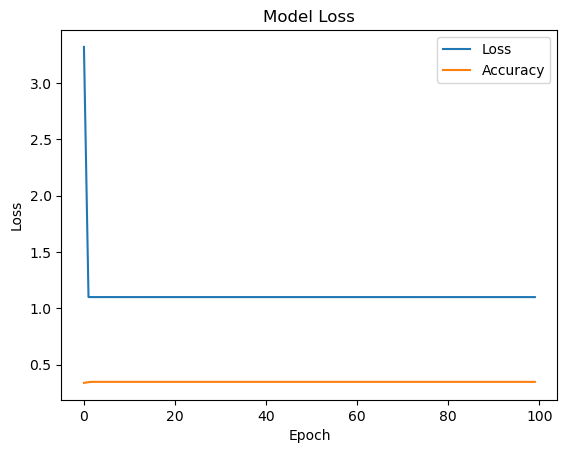

In [23]:
# Plot training & validation loss values
plt.plot(compare3_3.history['loss'])
plt.plot(compare3_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **3.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [19]:
model3_4=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3,activation="softmax")
])
model3_4.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [20]:
compare3_4 = model3_4.fit(x_train_scaled,np.array(y_train),epochs=50,callbacks=[callbacks])

Epoch 1/50
108/108 [==============================] - 7s 15ms/step - loss: 1.1942 - accuracy: 0.3266
Epoch 2/50
108/108 [==============================] - 2s 15ms/step - loss: 1.0989 - accuracy: 0.3444
Epoch 3/50
108/108 [==============================] - 1s 14ms/step - loss: 1.0985 - accuracy: 0.3459
Epoch 4/50
108/108 [==============================] - 1s 14ms/step - loss: 1.0984 - accuracy: 0.3450
Epoch 5/50
108/108 [==============================] - 1s 14ms/step - loss: 1.0984 - accuracy: 0.3456
Epoch 6/50
108/108 [==============================] - 1s 13ms/step - loss: 1.0985 - accuracy: 0.3438
Epoch 7/50
108/108 [==============================] - 2s 14ms/step - loss: 1.0985 - accuracy: 0.3450
Epoch 8/50
108/108 [==============================] - 2s 14ms/step - loss: 1.0983 - accuracy: 0.3459
Epoch 9/50
108/108 [==============================] - 2s 16ms/step - loss: 1.0984 - accuracy: 0.3456
Epoch 10/50
108/108 [==============================] - 2s 14ms/step - loss: 1.0984 - accura

In [21]:
model3_4.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 13ms/step - loss: 1.0980 - accuracy: 0.3511


[1.0979973077774048, 0.3510917127132416]

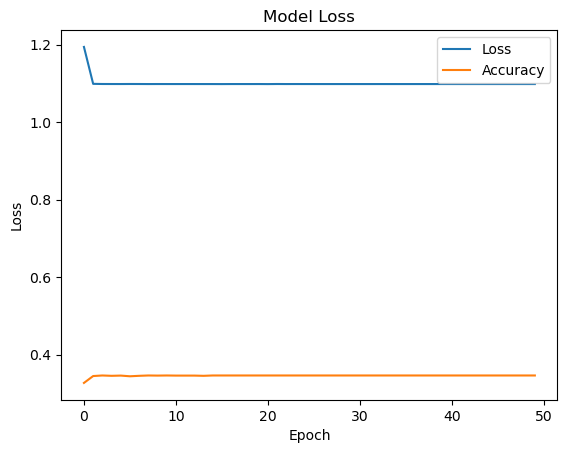

In [22]:
# Plot training & validation loss values
plt.plot(compare3_4.history['loss'])
plt.plot(compare3_4.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **3.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [19]:
model3_5=models.Sequential([
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(3,activation="softmax")
])
model3_5.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [20]:
compare3_5 = model3_5.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 8s 14ms/step - loss: 1.1355 - accuracy: 0.3773
Epoch 2/100
108/108 [==============================] - 1s 13ms/step - loss: 1.0374 - accuracy: 0.4594
Epoch 3/100
108/108 [==============================] - 1s 13ms/step - loss: 1.0069 - accuracy: 0.5051
Epoch 4/100
108/108 [==============================] - 1s 13ms/step - loss: 0.9669 - accuracy: 0.5485
Epoch 5/100
108/108 [==============================] - 1s 13ms/step - loss: 0.9444 - accuracy: 0.5738
Epoch 6/100
108/108 [==============================] - 1s 14ms/step - loss: 0.9092 - accuracy: 0.5994
Epoch 7/100
108/108 [==============================] - 2s 14ms/step - loss: 0.8945 - accuracy: 0.6154
Epoch 8/100
108/108 [==============================] - 1s 13ms/step - loss: 0.8702 - accuracy: 0.6271
Epoch 9/100
108/108 [==============================] - 1s 13ms/step - loss: 0.8464 - accuracy: 0.6445
Epoch 10/100
108/108 [==============================] - 1s 13ms/step - loss: 0.838

In [21]:
model3_5.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 14ms/step - loss: 0.4823 - accuracy: 0.7939


[0.4823097288608551, 0.7938864827156067]

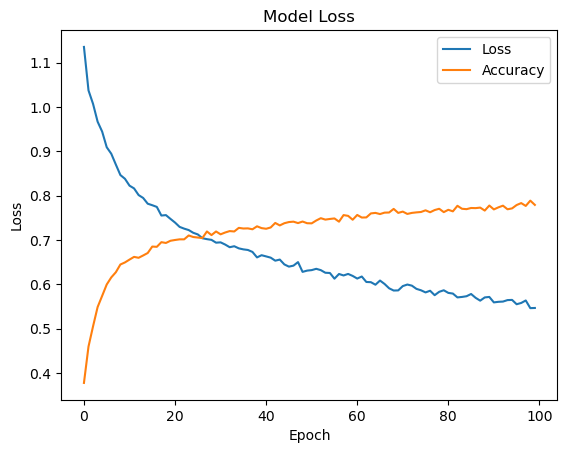

In [22]:
# Plot training & validation loss values
plt.plot(compare3_5.history['loss'])
plt.plot(compare3_5.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **4. CNN Model only with Augumentation layers**

# **4.1 Activation function = "Relu" ,Optimizer = "Adam"**

In [19]:
model4_1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model4_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [20]:
compare4_1 = model4_1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 26s 85ms/step - loss: 1.5431 - accuracy: 0.4346
Epoch 2/100
108/108 [==============================] - 10s 90ms/step - loss: 0.8006 - accuracy: 0.6539
Epoch 3/100
108/108 [==============================] - 9s 86ms/step - loss: 0.6981 - accuracy: 0.7013
Epoch 4/100
108/108 [==============================] - 9s 85ms/step - loss: 0.6570 - accuracy: 0.7295
Epoch 5/100
108/108 [==============================] - 9s 85ms/step - loss: 0.6156 - accuracy: 0.7456
Epoch 6/100
108/108 [==============================] - 10s 89ms/step - loss: 0.5968 - accuracy: 0.7540
Epoch 7/100
108/108 [==============================] - 9s 82ms/step - loss: 0.5922 - accuracy: 0.7493
Epoch 8/100
108/108 [==============================] - 9s 85ms/step - loss: 0.5608 - accuracy: 0.7645
Epoch 9/100
108/108 [==============================] - 10s 89ms/step - loss: 0.5415 - accuracy: 0.7703
Epoch 10/100
108/108 [==============================] - 9s 85ms/step - loss: 0

In [21]:
model4_1.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 19ms/step - loss: 0.4314 - accuracy: 0.8498


[0.4313817620277405, 0.8497816324234009]

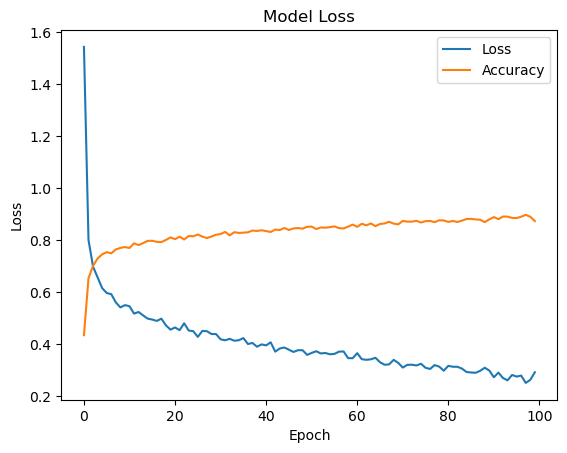

In [22]:
# Plot training & validation loss values
plt.plot(compare4_1.history['loss'])
plt.plot(compare4_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **4.2 Activation function = "Relu" ,Optimizer = "Adamax"**

In [18]:
model4_2=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model4_2.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
compare4_2 = model4_2.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 20s 85ms/step - loss: 1.8899 - accuracy: 0.3689
Epoch 2/100
108/108 [==============================] - 10s 89ms/step - loss: 1.0383 - accuracy: 0.4608
Epoch 3/100
108/108 [==============================] - 9s 85ms/step - loss: 0.9077 - accuracy: 0.5613
Epoch 4/100
108/108 [==============================] - 9s 83ms/step - loss: 0.8054 - accuracy: 0.6524
Epoch 5/100
108/108 [==============================] - 10s 90ms/step - loss: 0.7308 - accuracy: 0.6815
Epoch 6/100
108/108 [==============================] - 9s 85ms/step - loss: 0.7046 - accuracy: 0.6969
Epoch 7/100
108/108 [==============================] - 9s 84ms/step - loss: 0.6760 - accuracy: 0.7214
Epoch 8/100
108/108 [==============================] - 9s 85ms/step - loss: 0.6156 - accuracy: 0.7464
Epoch 9/100
108/108 [==============================] - 10s 89ms/step - loss: 0.5996 - accuracy: 0.7557
Epoch 10/100
108/108 [==============================] - 9s 83ms/step - loss: 0

In [20]:
model4_2.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 20ms/step - loss: 0.5110 - accuracy: 0.8541


[0.5109589099884033, 0.8541484475135803]

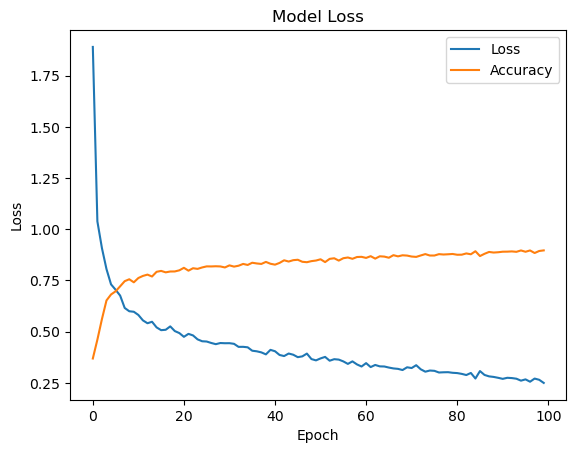

In [21]:
# Plot training & validation loss values
plt.plot(compare4_2.history['loss'])
plt.plot(compare4_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **4.3 Activation function = "Relu" ,Optimizer = "RMSprop"**

In [18]:
model4_3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model4_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
compare4_3 = model4_3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 21s 89ms/step - loss: 2.3122 - accuracy: 0.3392
Epoch 2/100
108/108 [==============================] - 9s 83ms/step - loss: 1.1093 - accuracy: 0.3552
Epoch 3/100
108/108 [==============================] - 10s 90ms/step - loss: 1.0209 - accuracy: 0.4809
Epoch 4/100
108/108 [==============================] - 9s 82ms/step - loss: 0.8202 - accuracy: 0.6396
Epoch 5/100
108/108 [==============================] - 9s 85ms/step - loss: 0.7270 - accuracy: 0.6815
Epoch 6/100
108/108 [==============================] - 9s 86ms/step - loss: 0.6696 - accuracy: 0.7138
Epoch 7/100
108/108 [==============================] - 10s 91ms/step - loss: 0.6471 - accuracy: 0.7272
Epoch 8/100
108/108 [==============================] - 9s 87ms/step - loss: 0.6477 - accuracy: 0.7191
Epoch 9/100
108/108 [==============================] - 9s 83ms/step - loss: 0.6021 - accuracy: 0.7502
Epoch 10/100
108/108 [==============================] - 9s 87ms/step - loss: 0.

In [20]:
model4_3.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 19ms/step - loss: 0.5042 - accuracy: 0.8114


[0.5042080879211426, 0.8113536834716797]

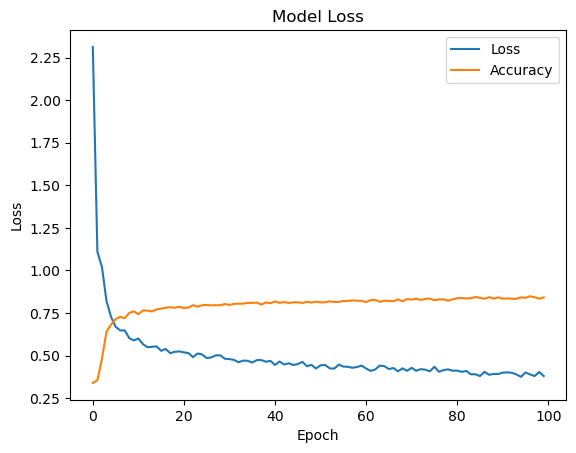

In [21]:
# Plot training & validation loss values
plt.plot(compare4_3.history['loss'])
plt.plot(compare4_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **4.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [18]:
model4_4=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model4_4.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
compare4_4 = model4_4.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 20s 94ms/step - loss: 1.1259 - accuracy: 0.3619
Epoch 2/100
108/108 [==============================] - 9s 84ms/step - loss: 1.0789 - accuracy: 0.3953
Epoch 3/100
108/108 [==============================] - 9s 87ms/step - loss: 1.0348 - accuracy: 0.4527
Epoch 4/100
108/108 [==============================] - 10s 92ms/step - loss: 1.0234 - accuracy: 0.4539
Epoch 5/100
108/108 [==============================] - 9s 87ms/step - loss: 0.9907 - accuracy: 0.4722
Epoch 6/100
108/108 [==============================] - 9s 86ms/step - loss: 0.9946 - accuracy: 0.4760
Epoch 7/100
108/108 [==============================] - 10s 92ms/step - loss: 0.9558 - accuracy: 0.5112
Epoch 8/100
108/108 [==============================] - 9s 86ms/step - loss: 0.9486 - accuracy: 0.5173
Epoch 9/100
108/108 [==============================] - 9s 83ms/step - loss: 0.9302 - accuracy: 0.5360
Epoch 10/100
108/108 [==============================] - 9s 85ms/step - loss: 0.

In [20]:
model4_4.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 19ms/step - loss: 0.4413 - accuracy: 0.8402


[0.44127076864242554, 0.840174674987793]

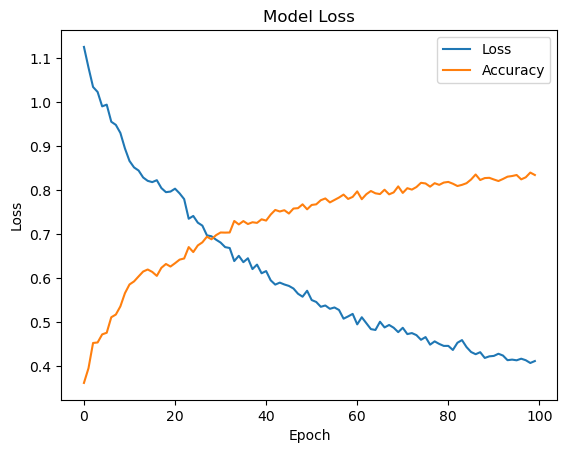

In [21]:
# Plot training & validation loss values
plt.plot(compare4_4.history['loss'])
plt.plot(compare4_4.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **4.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [18]:
model4_5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model4_5.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
compare4_5 = model4_5.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 21s 90ms/step - loss: 1.0921 - accuracy: 0.3796
Epoch 2/100
108/108 [==============================] - 10s 93ms/step - loss: 1.0776 - accuracy: 0.4279
Epoch 3/100
108/108 [==============================] - 9s 84ms/step - loss: 1.0606 - accuracy: 0.4844
Epoch 4/100
108/108 [==============================] - 9s 87ms/step - loss: 1.0426 - accuracy: 0.5121
Epoch 5/100
108/108 [==============================] - 10s 92ms/step - loss: 1.0296 - accuracy: 0.5208
Epoch 6/100
108/108 [==============================] - 9s 87ms/step - loss: 1.0183 - accuracy: 0.5412
Epoch 7/100
108/108 [==============================] - 9s 87ms/step - loss: 1.0025 - accuracy: 0.5648
Epoch 8/100
108/108 [==============================] - 9s 87ms/step - loss: 0.9887 - accuracy: 0.5753
Epoch 9/100
108/108 [==============================] - 10s 92ms/step - loss: 0.9786 - accuracy: 0.5753
Epoch 10/100
108/108 [==============================] - 9s 85ms/step - loss: 0

In [20]:
model4_5.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 19ms/step - loss: 0.6250 - accuracy: 0.7310


[0.624980092048645, 0.7310043573379517]

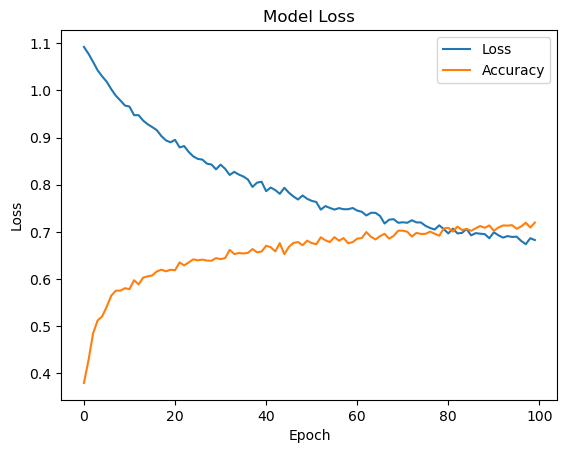

In [21]:
# Plot training & validation loss values
plt.plot(compare4_5.history['loss'])
plt.plot(compare4_5.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **5. CNN Model with two different augumentation layers**

# **5.1 Activation function = "Relu" ,Optimizer = "Adam"**

In [19]:
model5_1=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model5_1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [20]:
compare5_1 = model5_1.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 26s 101ms/step - loss: 1.8272 - accuracy: 0.5226
Epoch 2/100
108/108 [==============================] - 10s 93ms/step - loss: 0.6758 - accuracy: 0.7202
Epoch 3/100
108/108 [==============================] - 10s 94ms/step - loss: 0.6206 - accuracy: 0.7435
Epoch 4/100
108/108 [==============================] - 11s 99ms/step - loss: 0.5680 - accuracy: 0.7674
Epoch 5/100
108/108 [==============================] - 10s 94ms/step - loss: 0.5317 - accuracy: 0.7831
Epoch 6/100
108/108 [==============================] - 10s 97ms/step - loss: 0.5388 - accuracy: 0.7785
Epoch 7/100
108/108 [==============================] - 11s 101ms/step - loss: 0.4781 - accuracy: 0.8093
Epoch 8/100
108/108 [==============================] - 10s 93ms/step - loss: 0.4886 - accuracy: 0.8026
Epoch 9/100
108/108 [==============================] - 10s 91ms/step - loss: 0.4915 - accuracy: 0.8058
Epoch 10/100
108/108 [==============================] - 11s 100ms/step 

In [21]:
model5_1.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 20ms/step - loss: 2.4813 - accuracy: 0.4917


[2.4813122749328613, 0.491703063249588]

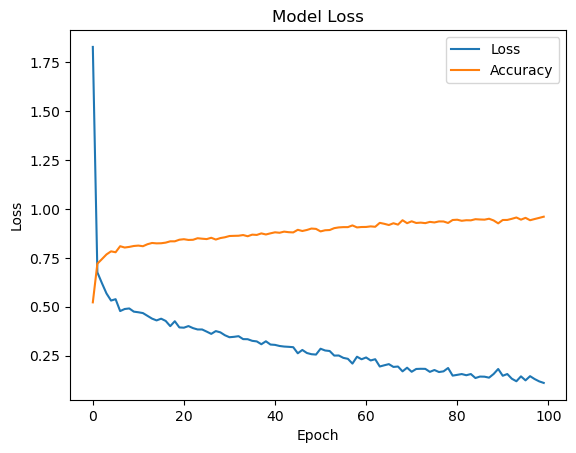

In [22]:
# Plot training & validation loss values
plt.plot(compare5_1.history['loss'])
plt.plot(compare5_1.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **5.2 Activation function = "Relu" ,Optimizer = "Adamax"**

In [19]:
model5_2=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model5_2.compile(optimizer="adamax",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [20]:
compare5_2 = model5_2.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 23s 109ms/step - loss: 2.7777 - accuracy: 0.5048
Epoch 2/100
108/108 [==============================] - 11s 99ms/step - loss: 0.7342 - accuracy: 0.6792
Epoch 3/100
108/108 [==============================] - 11s 99ms/step - loss: 0.6538 - accuracy: 0.7176
Epoch 4/100
108/108 [==============================] - 11s 106ms/step - loss: 0.6660 - accuracy: 0.7176
Epoch 5/100
108/108 [==============================] - 11s 99ms/step - loss: 0.6292 - accuracy: 0.7380
Epoch 6/100
108/108 [==============================] - 11s 100ms/step - loss: 0.6308 - accuracy: 0.7290
Epoch 7/100
108/108 [==============================] - 12s 110ms/step - loss: 0.5810 - accuracy: 0.7546
Epoch 8/100
108/108 [==============================] - 11s 101ms/step - loss: 0.5802 - accuracy: 0.7569
Epoch 9/100
108/108 [==============================] - 12s 109ms/step - loss: 0.5847 - accuracy: 0.7531
Epoch 10/100
108/108 [==============================] - 11s 103ms/s

In [21]:
model5_2.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 20ms/step - loss: 1.4242 - accuracy: 0.5362


[1.4242054224014282, 0.5362445712089539]

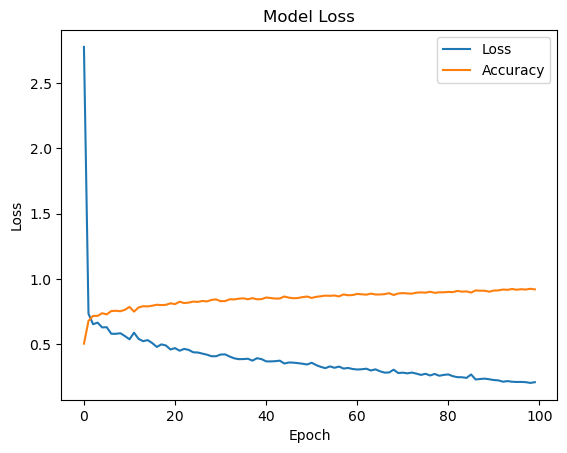

In [22]:
# Plot training & validation loss values
plt.plot(compare5_2.history['loss'])
plt.plot(compare5_2.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **5.3 Activation function = "Relu" ,Optimizer = "RMSprop"**

In [18]:
model5_3=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model5_3.compile(optimizer="RMSprop",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
compare5_3 = model5_3.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 26s 101ms/step - loss: 5.8436 - accuracy: 0.4969
Epoch 2/100
108/108 [==============================] - 10s 93ms/step - loss: 0.7540 - accuracy: 0.6751
Epoch 3/100
108/108 [==============================] - 10s 92ms/step - loss: 0.6732 - accuracy: 0.7249
Epoch 4/100
108/108 [==============================] - 11s 98ms/step - loss: 0.6307 - accuracy: 0.7368
Epoch 5/100
108/108 [==============================] - 10s 94ms/step - loss: 0.6471 - accuracy: 0.7403
Epoch 6/100
108/108 [==============================] - 10s 91ms/step - loss: 0.5976 - accuracy: 0.7534
Epoch 7/100
108/108 [==============================] - 11s 99ms/step - loss: 0.5960 - accuracy: 0.7659
Epoch 8/100
108/108 [==============================] - 10s 91ms/step - loss: 0.5344 - accuracy: 0.7747
Epoch 9/100
108/108 [==============================] - 10s 92ms/step - loss: 0.5278 - accuracy: 0.7843
Epoch 10/100
108/108 [==============================] - 10s 95ms/step - 

In [20]:
model5_3.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 19ms/step - loss: 2.9300 - accuracy: 0.4314


[2.930042028427124, 0.4314410388469696]

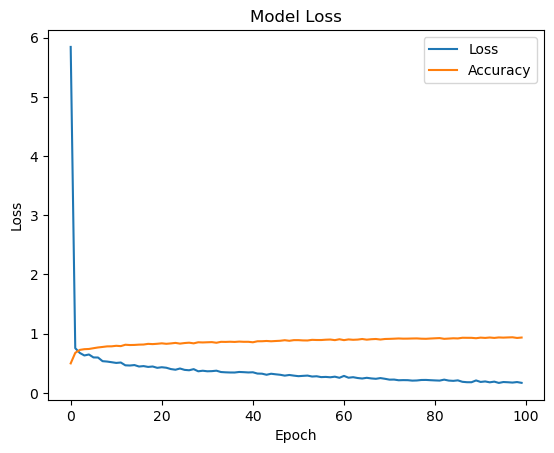

In [21]:
# Plot training & validation loss values
plt.plot(compare5_3.history['loss'])
plt.plot(compare5_3.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **5.4 Activation function = "Relu" ,Optimizer = "SGD"**

In [18]:
model5_4=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model5_4.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
compare5_4 = model5_4.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 25s 100ms/step - loss: 1.1169 - accuracy: 0.4148
Epoch 2/100
108/108 [==============================] - 10s 93ms/step - loss: 0.9779 - accuracy: 0.5339
Epoch 3/100
108/108 [==============================] - 10s 93ms/step - loss: 0.7983 - accuracy: 0.6373
Epoch 4/100
108/108 [==============================] - 11s 99ms/step - loss: 0.7009 - accuracy: 0.6946
Epoch 5/100
108/108 [==============================] - 10s 94ms/step - loss: 0.6566 - accuracy: 0.7170
Epoch 6/100
108/108 [==============================] - 10s 94ms/step - loss: 0.6310 - accuracy: 0.7380
Epoch 7/100
108/108 [==============================] - 10s 97ms/step - loss: 0.6176 - accuracy: 0.7392
Epoch 8/100
108/108 [==============================] - 10s 92ms/step - loss: 0.6071 - accuracy: 0.7394
Epoch 9/100
108/108 [==============================] - 10s 93ms/step - loss: 0.5688 - accuracy: 0.7677
Epoch 10/100
108/108 [==============================] - 10s 97ms/step - 

In [20]:
model5_4.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 2s 20ms/step - loss: 0.5922 - accuracy: 0.7712


[0.5922431349754333, 0.7711790204048157]

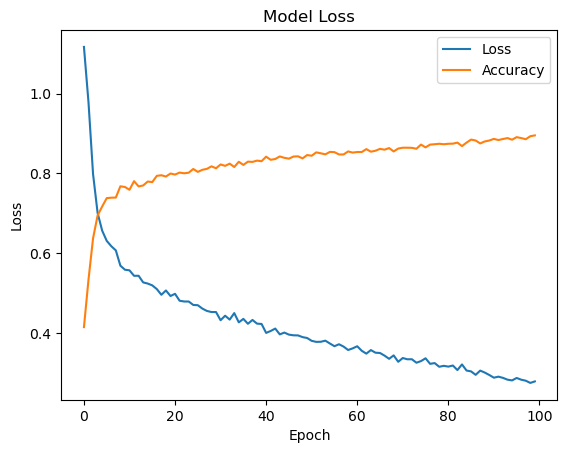

In [21]:
# Plot training & validation loss values
plt.plot(compare5_4.history['loss'])
plt.plot(compare5_4.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **5.5 Activation function = "Relu" ,Optimizer = "AdaDelta"**

In [18]:
model5_5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(3,activation="softmax")
])
model5_5.compile(optimizer="adadelta",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
compare5_5 = model5_5.fit(x_train_scaled,np.array(y_train),epochs=100,callbacks=[callbacks])

Epoch 1/100
108/108 [==============================] - 21s 95ms/step - loss: 1.0842 - accuracy: 0.4058
Epoch 2/100
108/108 [==============================] - 11s 98ms/step - loss: 1.0429 - accuracy: 0.4862
Epoch 3/100
108/108 [==============================] - 10s 93ms/step - loss: 1.0067 - accuracy: 0.5572
Epoch 4/100
108/108 [==============================] - 10s 93ms/step - loss: 0.9740 - accuracy: 0.5857
Epoch 5/100
108/108 [==============================] - 11s 100ms/step - loss: 0.9497 - accuracy: 0.6239
Epoch 6/100
108/108 [==============================] - 10s 95ms/step - loss: 0.9268 - accuracy: 0.6230
Epoch 7/100
108/108 [==============================] - 10s 93ms/step - loss: 0.9035 - accuracy: 0.6279
Epoch 8/100
108/108 [==============================] - 11s 99ms/step - loss: 0.8912 - accuracy: 0.6326
Epoch 9/100
108/108 [==============================] - 10s 93ms/step - loss: 0.8760 - accuracy: 0.6457
Epoch 10/100
108/108 [==============================] - 10s 93ms/step - 

In [20]:
model5_5.evaluate(x_test_scaled,np.array(y_test))

36/36 [==============================] - 1s 24ms/step - loss: 1.5785 - accuracy: 0.3738


[1.5784567594528198, 0.3737991154193878]

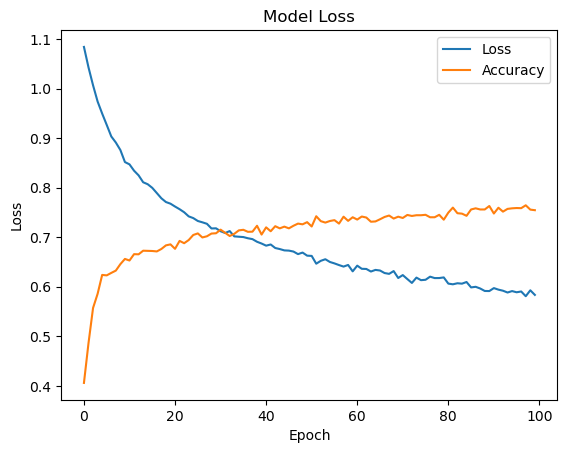

In [21]:
# Plot training & validation loss values
plt.plot(compare5_5.history['loss'])
plt.plot(compare5_5.history['accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

# **6. CNN Model with Data Augumentation layer and more dense layers**

In [ ]:
model5=models.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(2,activation="softmax")
])
model5.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model5.fit(x_train_scaled,np.array(y_train),epochs=5)

In [ ]:
model5.evaluate(x_test_scaled,np.array(y_test))

In [ ]:
visualkeras.layered_view(model5)

# **7. CNN Model that uses Filters in all the Layers**

In [ ]:
myCNN=tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dense(2,activation="softmax")    
])
myCNN.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
myCNN.fit(x_train_scaled,np.array(y_train),epochs=5)

In [ ]:
myCNN.evaluate(x_test_scaled,np.array(y_test))

In [ ]:
visualkeras.layered_view(myCNN)